   Unnamed: 0  Property Name    Price        House Type  Area in sq ft  \
0           0    Queens Road  1675000             House           2716   
1           1  Seward Street   650000  Flat / Apartment            814   
2           2    Hotham Road   735000  Flat / Apartment            761   
3           3   Festing Road  1765000             House           1986   
4           4   Spencer Walk   675000  Flat / Apartment            700   

   No. of Bedrooms  No. of Bathrooms  No. of Receptions     Location  \
0                5                 5                  5    Wimbledon   
1                2                 2                  2  Clerkenwell   
2                2                 2                  2       Putney   
3                4                 4                  4       Putney   
4                2                 2                  2       Putney   

  City/County Postal Code  
0      London    SW19 8NY  
1      London    EC1V 3PA  
2      London    SW15 1QL  
3      Lon

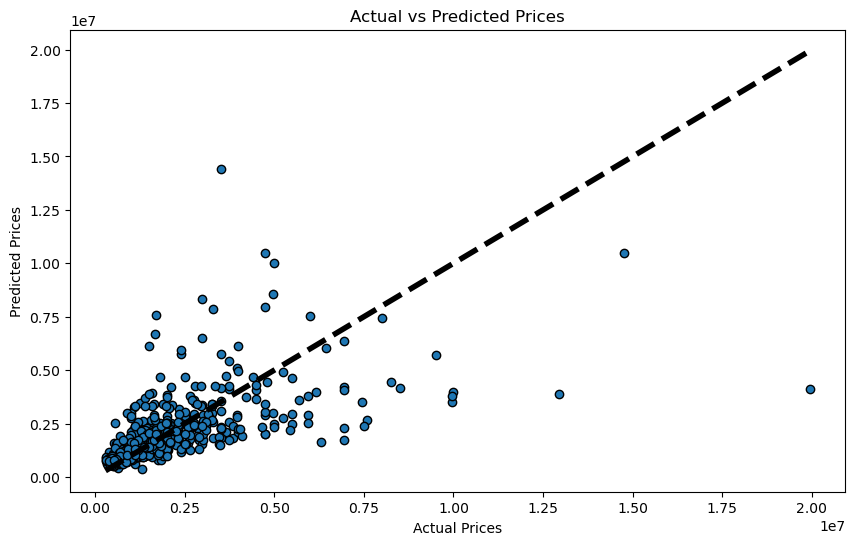

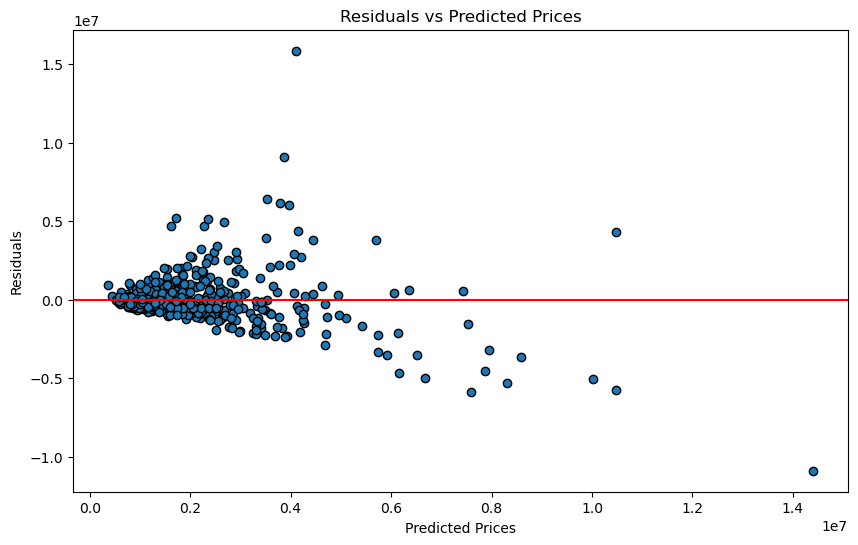

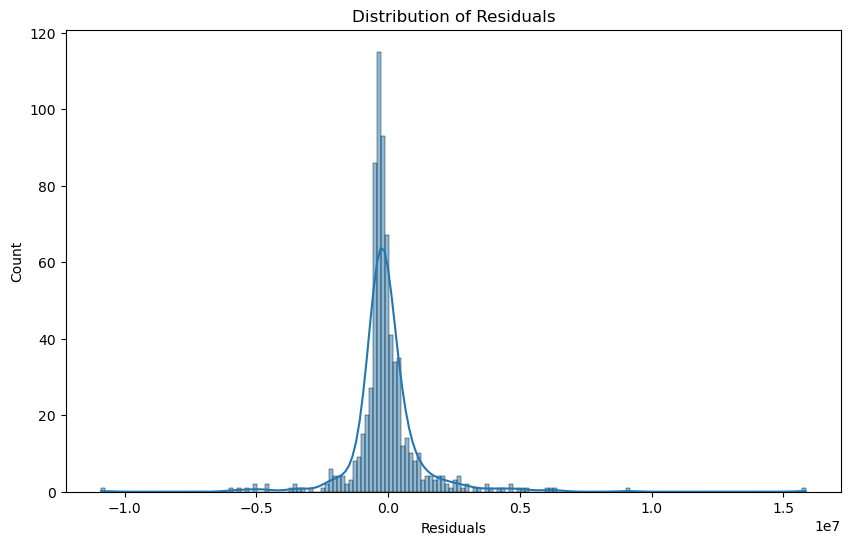

                    Coefficient
Area in sq ft       1441.159330
No. of Bedrooms  -168362.096641
No. of Bathrooms -168362.096641


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\91939\Downloads\London.csv")
# if unable to load dataset download dataset from kaggle and accordingly set path
# dataset link : https://www.kaggle.com/datasets/arnavkulkarni/housing-prices-in-london

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Select relevant features
features = ['Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms']
X = df[features]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print actual vs predicted values for the test set
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions.head(10))  # Print the first 10 actual vs predicted values

# Function to predict house price
def predict_price(area, bedrooms, bathrooms):
    input_data = pd.DataFrame({'Area in sq ft': [area], 'No. of Bedrooms': [bedrooms], 'No. of Bathrooms': [bathrooms]})
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# Example usage of the predict_price function
example_area = 1500  # Example area in sq ft
example_bedrooms = 3  # Example number of bedrooms
example_bathrooms = 2  # Example number of bathrooms

predicted_price = predict_price(example_area, example_bedrooms, example_bathrooms)
print(f"Predicted Price for a house with {example_area} sq ft, {example_bedrooms} bedrooms, and {example_bathrooms} bathrooms: ${predicted_price}")

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
